### Introduction to ML

#### Variable
Variable is defined as anything which is subject to change

Types of Variables -
* Continuous Variable
* Categorical Variable  
...and some more  


* Dependent Variable
* Independent Variable

#### Function
Function is defined as a mapping between independent and dependent variable - provided we have one dependent variable for a given set of independent variables. Machine learning model is analogous to a mathematical function

#### EDA (Exploratory Data Analysis)
The intent of exploring data is to get insights by inspecting the data and performing multivariate analysis. This step is typically the first step in an ML pipeline. Based on insights drawn from EDA we will be able to decide whether to go ahead with building an ML model or not, and if we would build an ML model what kind of model to choose.

### Understand the problem

On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, 
killing 1502 out of 2224 passengers and crew.
One of the reasons that the shipwreck led to such loss of life was that there were not enough 
lifeboats for the passengers and crew. Although there was some element of luck involved in surviving 
the sinking, some groups of people were more likely to survive than others.
Let us explore data to see what sorts of people were likely to survive. 

#### Data Dictionary
| Variable | Definition                                 | Key                                                                |
|----------|--------------------------------------------|--------------------------------------------------------------------|
| survival | Survival                                   | 0 = No, 1 = Yes                                                    |
| pclass   | Ticket                                     | 1 = 1st, 2 = 2nd, 3 = 3rd                                          |
| sex      | Sex                                        |                                                                    |
| Age      | Age in years                               |                                                                    |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                                    |
| parch    | # of parents / children aboard the Titanic |                                                                    |
| ticket   | Ticket number                              |                                                                    |
| fare     | Passenger fare                             |                                                                    |
| cabin    | Cabin number                               |                                                                    |
| embarked | Port of Embarkation| C = Cherbourg, Q = Queenstown, S = Southampton |

#### Variable Notes  
pclass: A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower  

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5  

sibsp: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

parch: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.  

### Generate Hypothesis

 1. Women and children (based on columns - Sex and Age) are more likely to survive than others  
 2. Upper class passengers are more likely to survive than others (based on column - Pclass)  
 Can you think of other hypothesis?

### Contents
* Load Libraries 
* Load Data
#### EDA
* Inspect summary
* Change dtypes for necessary columns
* Inspect and impute missing values
* Univariate Analysis - Outlier detection
#### Preprocessing
* Normalization
* Encoding (Dummies)
* Bivariate Analysis - Correlation plot
* Feature Engineering
* Hypotheses validation

### Install the necessary libraries

In [1]:
# There are two standard ways to install a package 
# 1) Using pip
# !pip install pandas --upgrade # Uncomment this line to directly install

# 2) Using conda
# !conda install pandas # Uncomment this line to directly install

# pip is recommended over conda
# Alternatively you can also install a package from Anaconda Navigator > Environments

### Import the required libraries/ modules

In [2]:
import pandas as pd
import os
from IPython.display import display

%matplotlib inline

### Read and inspect data

In [3]:
# Read data
titanic_data = pd.read_csv('Titanic.csv')

In [4]:
# Inspect the data
print(titanic_data.shape) #(891, 12)
titanic_data.head(10)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# Check the colums in the dataset
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Ensure the datatype of variables is appropriate

In [6]:
# Check the datatype of the variables
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# Update the datatype of columns appropriately
titanic_data.PassengerId = titanic_data.PassengerId.astype('str')
titanic_data.Survived = titanic_data.Survived.astype('category')
titanic_data.Pclass = titanic_data.Pclass.astype('category')

In [8]:
titanic_data.dtypes

PassengerId      object
Survived       category
Pclass         category
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object

### Descriptive analysis of the data

In [9]:
# Look at the profile of numeric variables
titanic_data.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


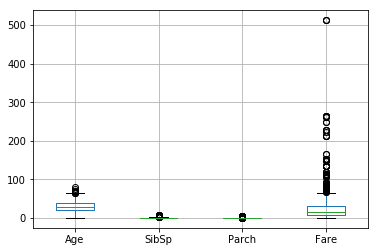

In [10]:
# Range of each numeric column is different
titanic_data.boxplot()


In [11]:
# Look at the profile of categorical variables
print(titanic_data.Survived.value_counts())
print('='*20)
print(titanic_data.Sex.value_counts())

0    549
1    342
Name: Survived, dtype: int64
male      577
female    314
Name: Sex, dtype: int64


### Missing value treatment

In [12]:
# Find the columns with missing values
titanic_data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

##### Numeric Variable

In [13]:
# Find the number of missing values in Age
print(pd.isna([titanic_data.Age]).sum())  # Total number of rows in the data-frame with 
print(pd.isna([titanic_data.Age]).mean()) # Average number of rows in the data-frame with 


177
0.19865319865319866


In [14]:
# Replace the missing values in age with average age of passengers
titanic_data.Age.fillna((titanic_data.Age.median()), inplace = True)

In [15]:
# Ensure that the missing values have been replaced
titanic_data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

##### Categorical Variable

In [16]:
# Check the class frequency of port of embarkment
titanic_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
# Find the number of missing values in Embarked
titanic_data.Embarked.isna().sum()

2

In [18]:
# Get the Passenger ID where Embarked is missing
titanic_data.PassengerId[titanic_data.Embarked.isna()]

61      62
829    830
Name: PassengerId, dtype: object

In [19]:
print(titanic_data.Embarked[62-1])
print(titanic_data.Embarked[830-1])

nan
nan


In [20]:
# Replace the missing values in Embarked with the most frequent class 'S'
titanic_data.Embarked.fillna(('S'), inplace = True)

In [21]:
# Ensure that the missing values have been replaced
print(titanic_data.Embarked[62-1])
print(titanic_data.Embarked[830-1])

S
S


##### Variable with lot of missing values

In [22]:
# Get the percentage of missing values in Cabin
print(titanic_data.isna().Cabin.mean())

'alternatively'
titanic_data.Cabin.isna().sum()/len(titanic_data)

0.7710437710437711


0.7710437710437711

In [23]:
# As 77% values are missing in the Cabin feature, it is recommended to drop this variable
titanic_data = titanic_data.drop('Cabin', axis = 1)

In [24]:
# Ensure that Cabin column has dropped
titanic_data.shape # (891, 11)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Outlier Analysis

In [25]:
import numpy as np
from scipy import stats

##### Using IQR

In [26]:
q1 = titanic_data.Age.quantile(0.25)
q3 = titanic_data.Age.quantile(0.75)
iqr = q3 - q1

In [27]:
low_limit = q1 - (1.5*iqr)
upper_limit = q3 + (1.5*iqr)

In [28]:
titanic_data[(titanic_data.Age < low_limit) | (titanic_data.Age > upper_limit)].sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.00,0,0,27042,30.0000,S
625,626,0,1,"Sutton, Mr. Frederick",male,61.00,0,0,36963,32.3208,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,S
232,233,0,2,"Sjostedt, Mr. Ernst Adolf",male,59.00,0,0,237442,13.5000,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.00,0,1,113509,61.9792,C
492,493,0,1,"Molson, Mr. Harry Markland",male,55.00,0,0,113787,30.5000,S
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,C
530,531,1,2,"Quick, Miss. Phyllis May",female,2.00,1,1,26360,26.0000,S
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,S


##### Using Boxplot and histogram

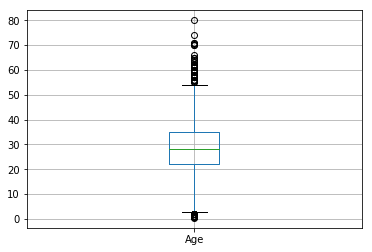

In [29]:
%matplotlib inline 
# above line will plot all images as cell outuput (this is run one time in a notebook)
titanic_data.boxplot(column = 'Age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22fb5b70>]],
      dtype=object)

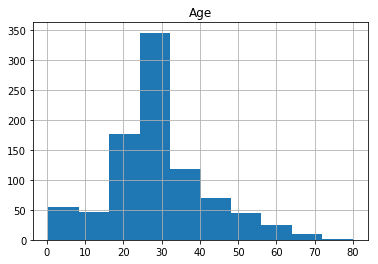

In [30]:
titanic_data.hist(column = 'Age')

### Variable Transformation

In [31]:
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [32]:
titanic_data.dtypes

PassengerId      object
Survived       category
Pclass         category
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked         object
dtype: object

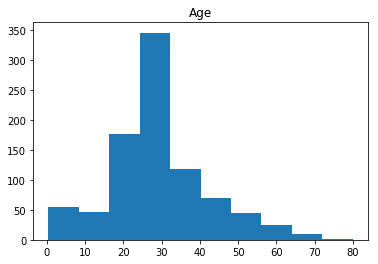

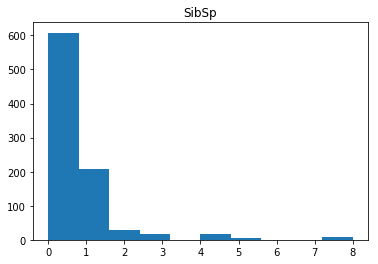

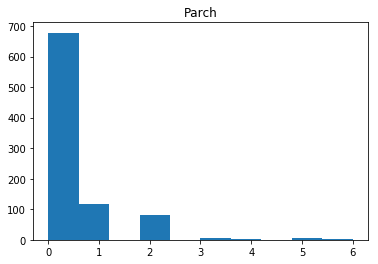

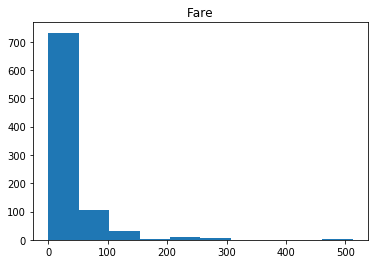

In [33]:
# Check the distribution of Fare
for column in titanic_data.describe().columns:
    plt.hist(titanic_data[column])
    plt.title(column)
    plt.show()
    

In [34]:
# Check the Skewness and Kurtosis for Fare
print(skew(titanic_data.Fare)) #4.78
print(kurtosis(titanic_data.Fare)) #33.20

4.7792532923723545
33.20428925264474


(array([ 15.,   0.,   2., 350., 167., 182.,  85.,  59.,  28.,   3.]),
 array([0.        , 0.62409174, 1.24818347, 1.87227521, 2.49636694,
        3.12045868, 3.74455041, 4.36864215, 4.99273388, 5.61682562,
        6.24091735]),
 <a list of 10 Patch objects>)

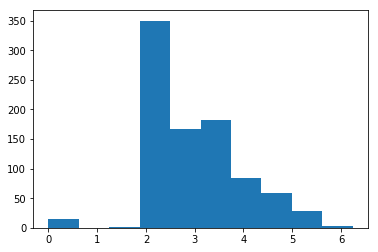

In [35]:
# As the distribution of Fare is right skewed log transformation may help in making it normal
plt.hist(np.log(titanic_data.Fare+1))

In [36]:
# Check the Skewness and Kurtosis for log of Fare
print(skew(np.log(titanic_data.Fare+1))) #0.39
print(kurtosis(np.log(titanic_data.Fare+1))) #0.96

0.39426283638993376
0.9639464598718401


In [37]:
# Add the transformed Fare column to the Titanic dataset. The transformed variable may perform better in the model
titanic_data['Fare_Log'] = np.log(titanic_data.Fare+1)

In [38]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_Log
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,2.202765


### Encoding

In [39]:
cat_cols = ['PassengerId', 'Pclass', 'Sex', 'Ticket', 'Embarked']
for col in cat_cols:
    print(col, titanic_data[col].nunique())
print('='*80)
    
cat_cols = ['Pclass', 'Sex', 'Embarked']
for col in cat_cols:
    print(col)
    print(titanic_data[col].value_counts())
    print('='*30)
    # Exercise: Plot bar chart for each column

PassengerId 891
Pclass 3
Sex 2
Ticket 681
Embarked 3
Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64
Sex
male      577
female    314
Name: Sex, dtype: int64
Embarked
S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [40]:
# display(titanic_data[cat_cols].head())
# display(pd.get_dummies(titanic_data[cat_cols]).head())
# display(pd.get_dummies(titanic_data[cat_cols], drop_first=True).head())
pd.get_dummies(titanic_data, columns=cat_cols, drop_first=True).head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Fare_Log,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2.110213,0,1,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,4.280593,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,2.188856,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,3.990834,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,2.202765,0,1,1,0,1


### Feature Engineering

In [41]:
# If age is less than 10 then call the passenger a child
def male_female_child(passenger):
    age, sex = passenger
    if age < 10:
        return 'child'
    else:
        return sex

In [42]:
# Add a new feature to the dataset Passenger_Type
titanic_data['Passenger_Type'] = titanic_data[['Age', 'Sex']].apply(male_female_child,axis = 1)

In [43]:
# Inspect the new feature
titanic_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_Log,Passenger_Type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2.110213,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,4.280593,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2.188856,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3.990834,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,2.202765,male
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,2.246893,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,3.967694,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,3.094446,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,2.495954,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,3.436268,female


### Univariate and Multivariate Analysis

In [44]:
titanic_data.Age.describe() # Median age of the passengers is 30 years

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Text(0, 0.5, 'Frequency')

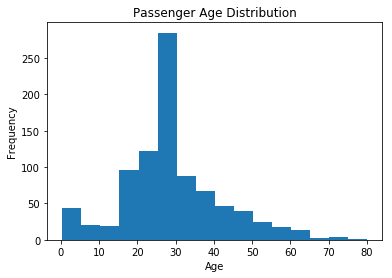

In [45]:
plt.hist(titanic_data.Age,bins=16) # Most of the passengers were in the age group of 20 to 40
plt.title('Passenger Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [46]:
# Correlation between two nummeric variables
titanic_data.Age.corr(titanic_data.Fare) # 0.09

0.09668842218036487

,Survived,Age,SibSp,Parch,Fare,Fare_Log
Survived,1.000000,-0.064910,-0.035322,0.081629,0.257307,0.329862
Age,-0.064910,1.000000,-0.233296,-0.172482,0.096688,0.110964
SibSp,-0.035322,-0.233296,1.000000,0.414838,0.159651,0.318528
Parch,0.081629,-0.172482,0.414838,1.000000,0.216225,0.332186
Fare,0.257307,0.096688,0.159651,0.216225,1.000000,0.787543
Fare_Log,0.329862,0.110964,0.318528,0.332186,0.787543,1.000000


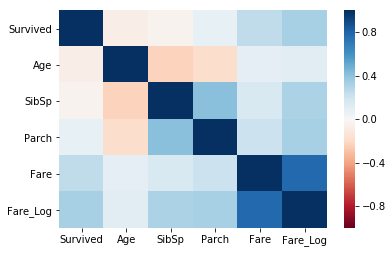

In [47]:
tmp = titanic_data.copy()
tmp['Survived'] = tmp['Survived'].astype('int')
display(tmp.corr()) # inter correlation of all numeric variables

import seaborn as sns

sns.heatmap(tmp.corr(),vmin=-1, vmax=1,cmap='RdBu')

In [48]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Fare_Log', 'Passenger_Type'],
      dtype='object')

In [49]:
# import matplotlib.pyplot as plt
# axes = pd.tools.plotting.scatter_matrix(tmp, alpha=0.2,figsize=(10,8))
# #plt.figure(figsize=(10,8))
# plt.tight_layout()
# plt.show

In [50]:
# Cross tab of two categorical variables - Passenger Type and Survived
Psg_Type_Survived = pd.crosstab(titanic_data.Passenger_Type, titanic_data.Survived,normalize = 'index')
# Inspect the cross tab
Psg_Type_Survived

Survived,0,1
Passenger_Type,,
child,0.387097,0.612903
female,0.246479,0.753521
male,0.834862,0.165138


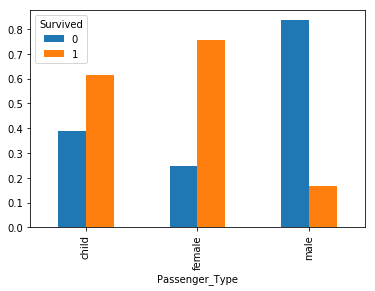

In [51]:
# Create a bar plot using the cross tab of Passenger Type and Survived
Psg_Type_Survived.plot.bar()
plt.show()

In [52]:
# Cross tab of two categorical variables - Passenger Ticket Class and Survived
Psg_Class_Survived = pd.crosstab(titanic_data.Pclass, titanic_data.Survived, normalize = 'index')

In [53]:
Psg_Class_Survived

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


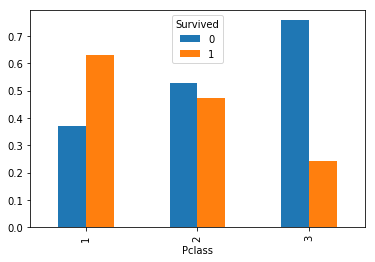

In [54]:
# Create a bar plot using the cross tab of Passenger Ticket Class and Survived
Psg_Class_Survived.plot.bar()
plt.show()